In [1]:
import os
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv("C:data.csv", encoding = "ISO-8859-1")
def normalize_numeric_minmax(df, name):
        df[name] = ((df[name] - df[name].min()) / (df[name].max() - df[name].min())).astype(np.float32)
df


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
normalize_numeric_minmax(df, 'CGPA')
normalize_numeric_minmax(df, 'Chance of Admit ')
X = df[['CGPA']]
y = df[['Chance of Admit ']] 

In [4]:
X

,CGPA
0,0.913462
1,0.663462
2,0.384615
3,0.599359
4,0.451923
...,...
495,0.711538
496,0.983974
497,0.884615
498,0.522436


In [5]:
y

,Chance of Admit
0,0.920635
1,0.666667
2,0.603175
3,0.730159
4,0.492063
...,...
495,0.841270
496,0.984127
497,0.936508
498,0.619048


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=10)

In [7]:
len(X_train)

400

In [8]:
len(X_test)

100

In [9]:
X_train

,CGPA
305,0.641026
107,0.852564
350,0.471154
334,0.592949
142,0.846154
...,...
320,0.544872
15,0.480769
484,0.349359
125,0.596154


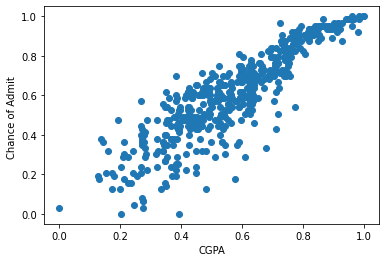

In [10]:
plt.xlabel('CGPA')
plt.ylabel('Chance of Admit ')
plt.scatter(df['CGPA'], df['Chance of Admit '])


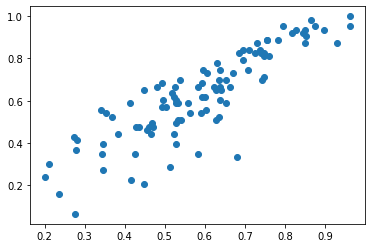

In [11]:
from sklearn import linear_model
plt.scatter(X_test, y_test)

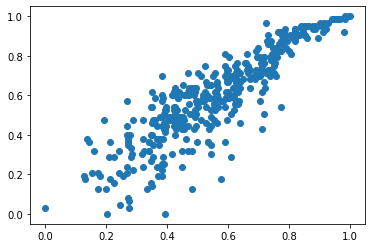

In [12]:
plt.scatter(X_train, y_train)

Root mean squared error = 0.1042
R-squared = 0.7506


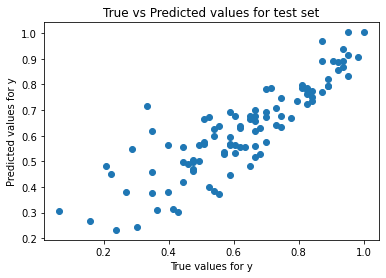

In [13]:
regr = linear_model.LinearRegression() #create linear regression obj
regr.fit(X_train, y_train) #train our data
y_pred = regr.predict(X_test) #predicting future y values from x values of test set
plt.scatter(y_test, y_pred)
plt.title('True vs Predicted values for test set') #predicted y values are consistent with current y values of test set
plt.xlabel('True values for y')
plt.ylabel('Predicted values for y')
print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(y_test, y_pred)))
print('R-squared = %.4f' % r2_score(y_test, y_pred))

Slope =  1.0156723
Intercept =  0.027138174


InvalidIndexError: (slice(None, None, None), None)

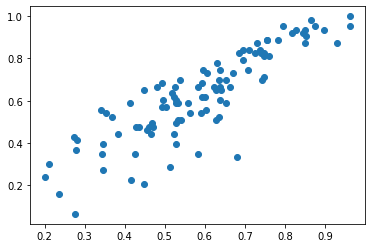

In [14]:
# Display model parameters
print('Slope = ', regr.coef_[0][0])
print('Intercept = ', regr.intercept_[0])### Step 4: Postprocessing

# Plot outputs
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, color='blue', linewidth=3)
titlestr = 'Predicted Function: y = %.2fX + %.2f' % (regr.coef_[0], regr.intercept_[0])
plt.title(titlestr)
plt.xlabel('X')
plt.ylabel('y')

In [ ]:
y_pred = regr.predict(X_train) #predict y values based on x values of train set
plt.scatter(y_train, y_pred)
plt.title('True vs Predicted values for training set')
plt.xlabel('True values for y')
plt.ylabel('Predicted values for y')
print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(y_train, y_pred)))
print('R-squared = %.4f' % r2_score(y_train, y_pred))

In [ ]:
regr.fit(X_test, y_test) # train data based on test data
y_pred = regr.predict(X_test) # predict future y values based on x values of test data
plt.scatter(y_test, y_pred)
plt.title('Predict Chance of Admission based on CGPA values of test data')
plt.xlabel('True values for y')
plt.ylabel('Predicted values for y')
print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(y_test, y_pred)))
print('R-squared = %.4f' % r2_score(y_test, y_pred))

In [ ]:
#####multiple linear regression
normalize_numeric_minmax(df, 'GRE Score')
normalize_numeric_minmax(df, 'TOEFL Score')
normalize_numeric_minmax(df, 'University Rating')
normalize_numeric_minmax(df, 'SOP')
normalize_numeric_minmax(df, 'LOR ')
normalize_numeric_minmax(df, 'CGPA')
normalize_numeric_minmax(df, 'Chance of Admit ')
X=df[['GRE Score', 'TOEFL Score','University Rating','SOP', 'LOR ', 'CGPA']].values
y=df[['Chance of Admit ']].values
#X=df[['CGPA']].values
numInstances = 500
numTrain = 400   # number of training instances
numTest = numInstances - numTrain

X_train = X[:-numTest]
X_test = X[-numTest:]
y_train = y[:-numTest]
y_test = y[-numTest:]

In [15]:
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train) #fit regression model to training data

LinearRegression()

In [16]:
y_pred = regr.predict(X_test) #predict future y value based on x values of test data

Root mean squared error = 0.1042
R-squared = 0.7506


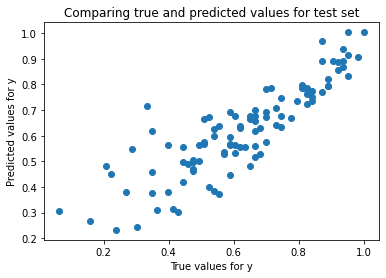

In [17]:
plt.scatter(y_test, y_pred)
plt.title('Comparing true and predicted values for test set')
plt.xlabel('True values for y')
plt.ylabel('Predicted values for y')

# Model evaluation
print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(y_test, y_pred)))
print('R-squared = %.4f' % r2_score(y_test, y_pred))

Root mean squared error = 0.1041
R-squared = 0.7512


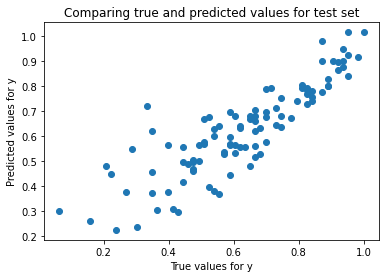

In [18]:
# Fit regression model to the test set
regr.fit(X_test, y_test)

# Apply model to the test set
y_pred = regr.predict(X_test)

# Comparing true versus predicted values
plt.scatter(y_test, y_pred)
plt.title('Comparing true and predicted values for test set')
plt.xlabel('True values for y')
plt.ylabel('Predicted values for y')

# Model evaluation
print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(y_test, y_pred)))
print('R-squared = %.4f' % r2_score(y_test, y_pred))

In [19]:
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,0.913462,1,0.920635
1,2,324,107,4,4.0,4.5,0.663462,1,0.666667
2,3,316,104,3,3.0,3.5,0.384615,1,0.603175
3,4,322,110,3,3.5,2.5,0.599359,1,0.730159
4,5,314,103,2,2.0,3.0,0.451923,0,0.492063
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,0.711538,1,0.841270
496,497,337,117,5,5.0,5.0,0.983974,1,0.984127
497,498,330,120,5,4.5,5.0,0.884615,1,0.936508
498,499,312,103,4,4.0,5.0,0.522436,0,0.619048


In [23]:
#There are 9 columns. We want to descretize the last one.
#df['Chance of Admit '] = df['Chance of Admit '].astype(float)
df2 = df



#df2['Chance of Admit '].mask(df2['Chance of Admit ']<.70, 'Not Admitted', inplace = True)
#df2['Chance of Admit '].mask((df2['Chance of Admit '] > .70 & df['Chance of Admit ']), 'Likely Admitted', inplace = True)
#df2['Chance of Admit '].mask(df2['Chance of Admit ']>.90, 'Admitted', inplace = True)




replace_dict = {
        'Not Admitted': 0.69, 
        'Likely Admitted': 0.89, 
        'Admitted': 0.99, 
}
k=1
for i, j in replace_dict.items():
    df2.loc[df2['Chance of Admit '].between(k,j)] = i
    k=j+1

In [24]:
df2[0:10]

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,0.913462,1,0.920635
1,2,324,107,4,4.0,4.5,0.663462,1,0.666667
2,3,316,104,3,3.0,3.5,0.384615,1,0.603175
3,4,322,110,3,3.5,2.5,0.599359,1,0.730159
4,5,314,103,2,2.0,3.0,0.451923,0,0.492063
5,6,330,115,5,4.5,3.0,0.814103,1,0.888889
6,7,321,109,3,3.0,4.0,0.448718,1,0.650794
7,8,308,101,2,3.0,4.0,0.352564,0,0.539683
8,9,302,102,1,2.0,1.5,0.384615,0,0.253968
9,10,323,108,3,3.5,3.0,0.576923,0,0.174603
